<a href="https://colab.research.google.com/github/shahab271069/Python-Course/blob/main/09/9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Classification, Clustering, and Dimensionality Reduction

This notebook introduces machine learning classification, clustering, and dimensionality reduction techniques. We will explore various models, their applications, and how to implement them using Python.

## Table of Contents
1. Introduction to Classification
2. Classification Models
   - Logistic Regression
   - Decision Trees
   - Random Forest
   - Support Vector Machines
3. Introduction to Clustering
4. Clustering Models
   - K-Means
   - Hierarchical Clustering
   - DBSCAN
5. Introduction to Dimensionality Reduction
6. Dimensionality Reduction Techniques
   - PCA (Principal Component Analysis)
   - t-SNE (t-distributed Stochastic Neighbor Embedding)

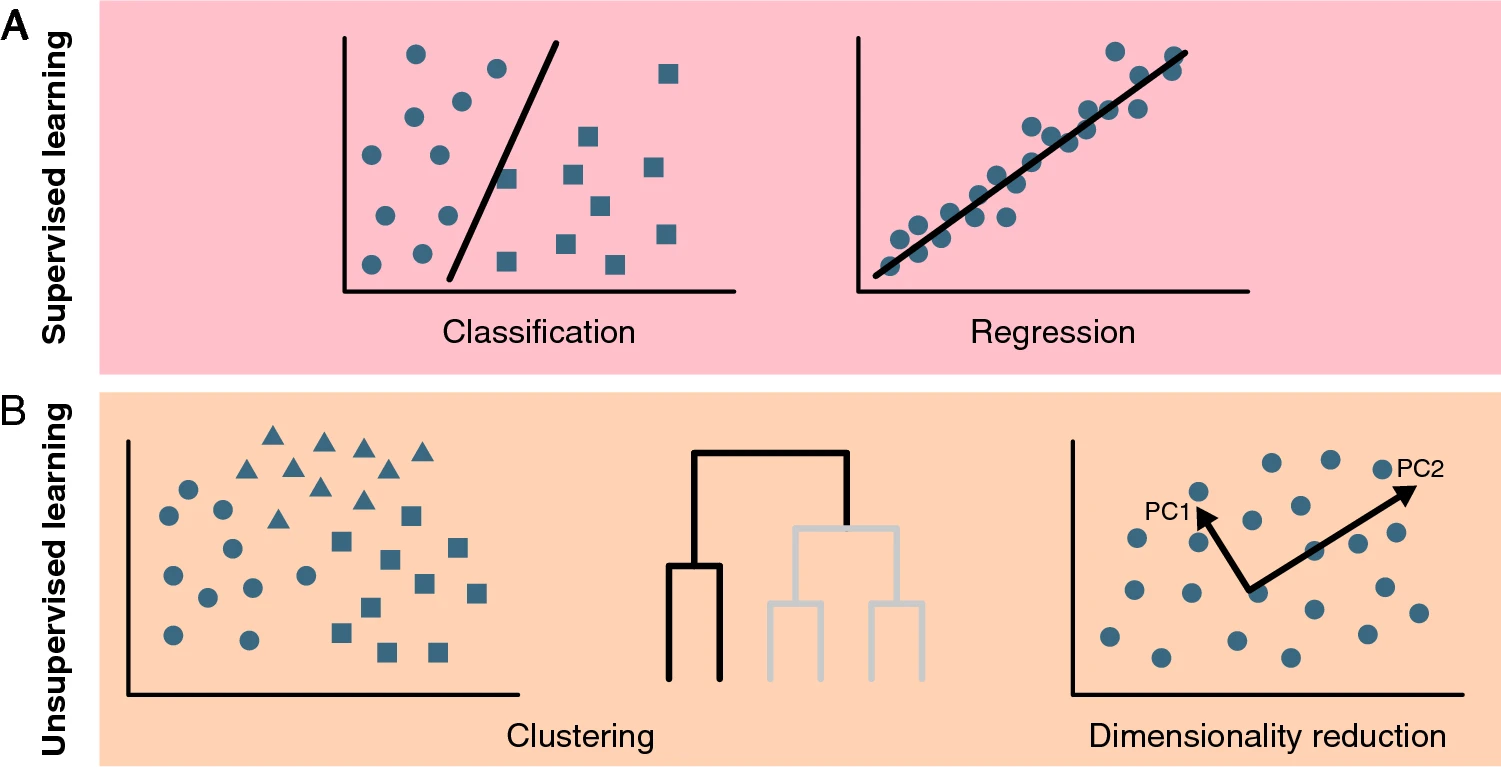

#2. Introduction to Classification

Classification is a supervised learning task where the goal is to predict the category or class label of a given input based on its features. Unlike clustering, classification relies on labeled data to train a model.

---

## Problem Setup
- **Input Space ($( \mathcal{X} )$)**: A space where each element \( $x$ in $\mathcal{X}$ \) represents a feature vector.
- **Output Space ($( \mathcal{Y} )$)**: A finite set of class labels, \( $\mathcal{Y} = \{1, 2, \dots, K\}$ \), where \( $K$ \) is the number of classes.
- **Training Data**: A labeled dataset, \( $D = \{(x_i, y_i)\}_{i=1}^n$ \), where \( $x_i \in \mathcal{X}$ \) and \( $y_i \in \mathcal{Y}$ \).
- **Objective**: Learn a function \( $h: \mathcal{X} \to \mathcal{Y}$ \) (hypothesis or classifier) such that for a new, unseen input \( $x$ \), \( $h(x)$ \) predicts the correct class label \( $y$ \).

---

## Key Mathematical Concepts

1. **Classifier Function**: The goal is to find a function \( $h$ \) that minimizes the classification error:
   
   $[
   \text{Error}(h) = \frac{1}{n} \sum_{i=1}^n \mathbb{I}[h(x_i) \neq y_i]
   ]$
   
   where \( $\mathbb{I}$ \) is the indicator function, which equals 1 if \( $h(x_i) \neq y_i$ \), and 0 otherwise.

2. **Probabilistic Models**: Many classifiers predict probabilities for each class, \( $P(y \mid x)$ \), and assign the label with the highest probability:
   
   $[
   h(x) = \arg\max_{y \in \mathcal{Y}} P(y \mid x)
   ]$
   
3. **Feature Representation**: Inputs \( $x$ \) are often represented in \( $\mathbb{R}^d$ \), where \( $d$ \) is the number of features (dimensions). Each input \( $x$ \) can be written as a vector \( $x = [x_1, x_2, \dots, x_d]$ \).

---

## Examples of Classification Algorithms

- **Logistic Regression**: Models the probability of each class using a logistic function.
- **Support Vector Machines (SVM)**: Finds a hyperplane that separates classes with the maximum margin.
- **Decision Trees**: Splits data into subsets based on feature values to form a tree structure.
- **Neural Networks**: Uses layers of interconnected nodes to learn complex decision boundaries.
- **k-Nearest Neighbors (k-NN)**: Assigns a class based on the majority class of the \( $k$ \)-nearest neighbors in the feature space.

---

## Applications

- **Spam Detection**: Classifying emails as spam or not spam.
- **Image Recognition**: Identifying objects or people in images.
- **Sentiment Analysis**: Classifying text as positive, negative, or neutral sentiment.
- **Medical Diagnosis**: Predicting diseases based on patient features.

---


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## 2. Classification Models

### Logistic Regression
Logistic Regression is a linear model used for binary classification. It predicts the probability that an instance belongs to a particular category.

In [55]:
# Load dataset
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10000, stratify=y)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=500,solver='liblinear',penalty='l2')
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred,  normalize='all')
accuracy, conf_matrix

(1.0,
 array([[0.33333333, 0.        , 0.        ],
        [0.        , 0.33333333, 0.        ],
        [0.        , 0.        , 0.33333333]]))

In [42]:
accuracy

1.0

In [43]:
conf_matrix

array([[0.33333333, 0.        , 0.        ],
       [0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333]])

In [44]:
iris.target.reset_index().groupby('target').count()

,index
target,
0,50
1,50
2,50


In [45]:
iris['target']

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Decision Trees
Decision Trees model decisions based on a series of questions. They are easy to interpret and can handle both numerical and categorical data.

In [54]:
# Load dataset
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10000, stratify=y)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=200)
tree_clf.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_clf.predict(X_test)

# Accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
accuracy_tree, conf_matrix_tree

(1.0,
 array([[10,  0,  0],
        [ 0, 10,  0],
        [ 0,  0, 10]]))

### Random Forest
Random Forest is an ensemble method that uses multiple decision trees to improve classification accuracy.

In [58]:
# Load dataset
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10000, stratify=y)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf, conf_matrix_rf

(1.0,
 array([[10,  0,  0],
        [ 0, 10,  0],
        [ 0,  0, 10]]))

### Support Vector Machines (SVM)
SVM is a powerful classification algorithm that works well in high-dimensional spaces.

In [59]:
# Support Vector Machine
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_clf.predict(X_test)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
accuracy_svm, conf_matrix_svm

(1.0,
 array([[10,  0,  0],
        [ 0, 10,  0],
        [ 0,  0, 10]]))

#3. Introduction to Clustering

Clustering is an unsupervised learning task where the goal is to group a set of data points into clusters such that points within the same cluster are more similar to each other than to points in other clusters. Unlike classification, clustering does not rely on labeled data.

---

## Problem Setup
- **Input Space ($( \mathcal{X} )$)**: A space where each element \( $x$ in $\mathcal{X}$ \) represents a feature vector.
- **Output**: A partitioning of the dataset into \( $k$ \) clusters, \( $\{C_1, C_2, \dots, C_k\}$ \), where:
  - $( C_i \subset \mathcal{X} )$ for all \( $i$ \),
  - $( C_i \cap C_j = \emptyset )$ for \( $i \neq j$ \),
  - $( \bigcup_{i=1}^k C_i = \mathcal{X} )$.

---

## Key Mathematical Concepts

1. **Similarity Measures**: Clustering relies on a similarity or distance measure to group points. Common distance measures include:
   - **Euclidean Distance**:
     
     $\[
     d(x_i, x_j) = \sqrt{\sum_{m=1}^d (x_{i,m} - x_{j,m})^2}
     \]$
     
   - **Manhattan Distance**:
     
     $\[
     d(x_i, x_j) = \sum_{m=1}^d |x_{i,m} - x_{j,m}|
     \]$
     
   - **Cosine Similarity**:
     
     $\[
     \text{cos}(x_i, x_j) = \frac{x_i \cdot x_j}{\|x_i\| \|x_j\|}
     \]$
     

2. **Objective Function**: The goal is often to minimize or maximize a criterion based on the clusters. For example:
   - **k-Means Clustering** minimizes within-cluster variance:
     
     $[
     \text{argmin}_C \sum_{i=1}^k \sum_{x \in C_i} \|x - \mu_i\|^2
     ]$
     
     where $\( \mu_i \)$ is the centroid of cluster $\( C_i \)$.

   - **Hierarchical Clustering** builds a dendrogram based on a linkage criterion (e.g., single, complete, or average linkage).

3. **Number of Clusters ($( k )$)**: The number of clusters can be predetermined or determined using methods like:
   - **Elbow Method**: Plot total within-cluster variance versus \( $k$ \).
   - **Silhouette Score**: Measures how similar a point is to its cluster compared to other clusters.

---

## Examples of Clustering Algorithms

- **k-Means**: Partitions data into \( $k$ \) clusters by iteratively updating centroids.
- **DBSCAN**: Groups points based on density, identifying clusters of varying shapes.
- **Agglomerative Clustering**: A hierarchical approach that merges clusters based on a linkage criterion.
- **Gaussian Mixture Models (GMM)**: Uses probabilistic models assuming data is generated from a mixture of Gaussians.
- **Spectral Clustering**: Uses graph-based techniques to cluster data.

---

## Applications

- **Customer Segmentation**: Grouping customers based on purchasing behavior.
- **Image Segmentation**: Dividing an image into regions for analysis.
- **Document Clustering**: Grouping documents with similar topics or content.
- **Anomaly Detection**: Identifying outliers or unusual data points as separate clusters.

---


## 4. Clustering Models

### K-Means
K-Means is a popular clustering algorithm that partitions data into K distinct clusters based on distance to the centroid of each cluster.

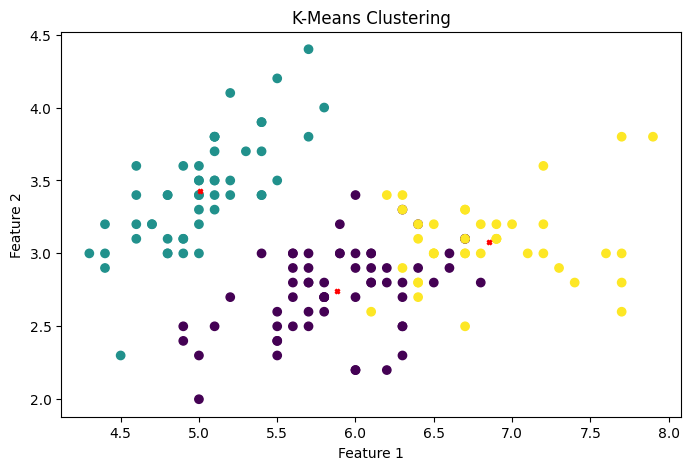

In [77]:
# K-Means Clustering
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=10000,max_iter=10000)
kmeans.fit(X)

# Cluster labels
labels = kmeans.labels_

# Plotting
plt.figure(figsize=(8, 5))
# Use .iloc for integer-location based indexing to access columns 0 and 1
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=10)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [79]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [81]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
# Accuracy
accuracy_svm = accuracy_score(y, kmeans.predict(X))
conf_matrix_svm = confusion_matrix(y, kmeans.predict(X))
accuracy_svm, conf_matrix_svm

(0.24,
 array([[ 0, 50,  0],
        [47,  0,  3],
        [14,  0, 36]]))

In [96]:
from sklearn.cluster import KMeans

def sorted_cluster(x, model=None):
    if model == None:
        model = KMeans()
    model = sorted_cluster_centers_(model, x)
    model = sorted_labels_(model, x)
    return model

def sorted_cluster_centers_(model, x):
    model.fit(x)
    new_centroids = []
    magnitude = []
    for center in model.cluster_centers_:
        magnitude.append(np.sqrt(center.dot(center)))
    idx_argsort = np.argsort(magnitude)
    model.cluster_centers_ = model.cluster_centers_[idx_argsort]
    return model

def sorted_labels_(sorted_model, x):
    sorted_model.labels_ = sorted_model.predict(x)
    return sorted_model

In [83]:
cluster = sorted_cluster(X, kmeans)

In [85]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [86]:
# Accuracy
accuracy_svm = accuracy_score(y, cluster.labels_)
conf_matrix_svm = confusion_matrix(y, cluster.labels_)
accuracy_svm, conf_matrix_svm

(0.8866666666666667,
 array([[50,  0,  0],
        [ 0, 47,  3],
        [ 0, 14, 36]]))

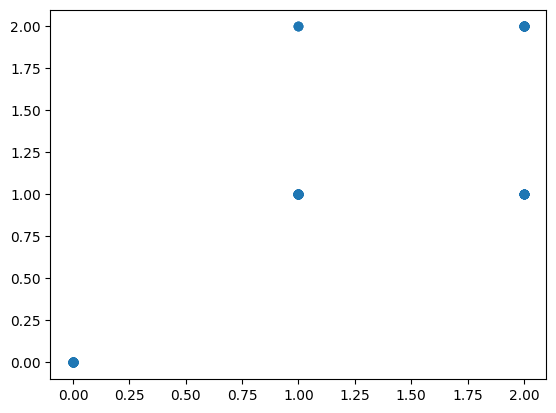

In [88]:
plt.scatter(y, cluster.labels_)

### Hierarchical Clustering
Hierarchical Clustering creates a tree of clusters by either a bottom-up or top-down approach.

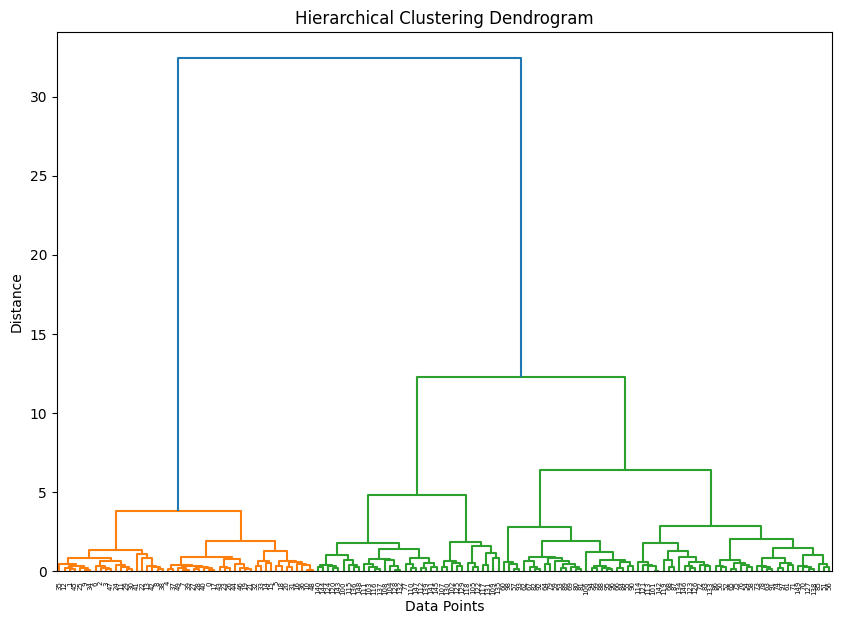

In [89]:
# Hierarchical Clustering
import scipy.cluster.hierarchy as sch

# Generate the linkage matrix
linkage_matrix = sch.linkage(X, method='ward')

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [101]:
# prompt: give me the accuracy of sch

# Accuracy of Hierarchical Clustering is not directly available like in other models.
# Hierarchical clustering produces a dendrogram, which shows the hierarchical relationships between data points.
# You would determine the number of clusters visually from the dendrogram and then evaluate the resulting clusters.

# Example of how you might evaluate the clusters obtained from a dendrogram:
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you've cut the dendrogram at a specific level to obtain cluster labels (e.g., using scipy.cluster.hierarchy.fcluster)
# Let's say 'cluster_labels' contains these labels

# Replace this with your actual cluster labels obtained from the dendrogram
cluster_labels = sch.fcluster(linkage_matrix, t=3, criterion='maxclust')

accuracy_hc = accuracy_score(y, cluster_labels-1)
conf_matrix_hc = confusion_matrix(y, cluster_labels-1)
print("Accuracy of Hierarchical Clustering:", accuracy_hc)
print("Confusion Matrix of Hierarchical Clustering:\n", conf_matrix_hc)

Accuracy of Hierarchical Clustering: 0.44
Confusion Matrix of Hierarchical Clustering:
 [[50  0  0]
 [ 0  1 49]
 [ 0 35 15]]


In [102]:
cluster_labels-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [100]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups together points that are closely packed together, while marking as outliers points that lie alone in low-density regions.

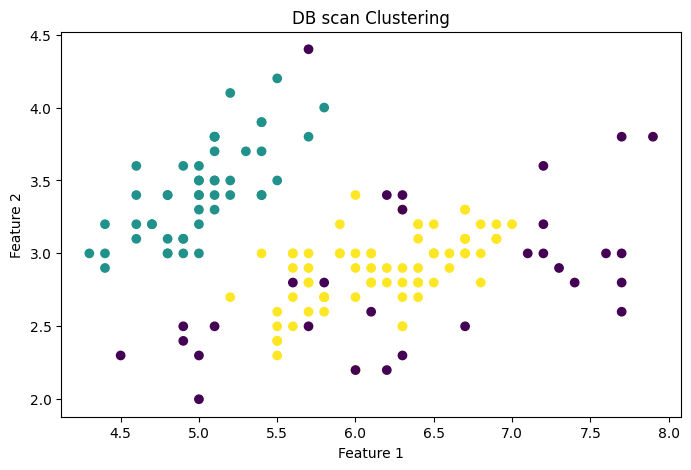

In [115]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

# Plotting
plt.figure(figsize=(8, 5))
# Use .iloc for integer-location based indexing to access columns 0 and 1
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DB scan Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [118]:
dbscan_labels+1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2])

In [117]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [119]:
accuracy_hc = accuracy_score(y, dbscan_labels+1)
conf_matrix_hc = confusion_matrix(y, dbscan_labels+1)
print("Accuracy of Hierarchical Clustering:", accuracy_hc)
print("Confusion Matrix of Hierarchical Clustering:\n", conf_matrix_hc)

Accuracy of Hierarchical Clustering: 0.2
Confusion Matrix of Hierarchical Clustering:
 [[ 2 48  0]
 [ 6  0 44]
 [22  0 28]]


# 5. Introduction to Dimensionality Reduction


Dimensionality reduction is an unsupervised learning task where the goal is to reduce the number of features in a dataset while preserving as much meaningful information as possible. This is often done to simplify models, reduce noise, or visualize high-dimensional data.

---

## Problem Setup
- **Input Space ($( \mathcal{X} )$)**: A high-dimensional space where each element \( $x \in \mathcal{X}$ \) is represented as a vector \( $x = [x_1, x_2, \dots, x_d]$ \), with \( $d$ \) features (dimensions).
- **Reduced Space ($( \mathcal{Z} )$)**: A lower-dimensional space where \( $\mathcal{Z} = \mathbb{R}^k$ \) and \( $k < d$ \).
- **Objective**: Learn a mapping \( $f: \mathcal{X} \to \mathcal{Z}$ \) such that the structure or variability in the original data is retained as much as possible.

---

## Key Mathematical Concepts

1. **Variance Preservation**: Many dimensionality reduction methods aim to preserve the variance of the data:
   - Given a dataset with mean \( $\mu$ \), the total variance is:
     $\[
     \text{Var} = \frac{1}{n} \sum_{i=1}^n \|x_i - \mu\|^2
     \]$

2. **Distance Preservation**: In some methods (e.g., t-SNE), the pairwise distances or similarities between points are preserved in the lower-dimensional space.

3. **Linear Projection**:
   - Dimensionality reduction often involves projecting the data onto a lower-dimensional subspace:
     $\[
     z = W^T x
     \]$
     where \( $W$ \) is a \( $d \times k$ \) transformation matrix.

---

## Examples of Dimensionality Reduction Algorithms

1. **Principal Component Analysis (PCA)**:
   - Finds the directions (principal components) that maximize the variance of the data.
   - Solves the optimization problem:
     $\[
     \text{argmax}_W \, \|W^T X\|^2 \quad \text{subject to} \, W^T W = I
     \]$

2. **t-Distributed Stochastic Neighbor Embedding (t-SNE)**:
   - Focuses on preserving local structure and visualizing high-dimensional data in 2D or 3D.
   - Minimizes the Kullback-Leibler divergence between pairwise similarities in high and low dimensions.

3. **Linear Discriminant Analysis (LDA)**:
   - A supervised technique that maximizes class separability in the reduced space.
   - Optimizes the ratio of between-class variance to within-class variance.

4. **Autoencoders**:
   - Neural networks that compress input data into a lower-dimensional representation (latent space) and reconstruct it.

5. **Isomap**:
   - Preserves geodesic distances in a manifold for non-linear dimensionality reduction.

---

## Applications

- **Data Visualization**: Reducing data to 2D or 3D for easy visualization.
- **Noise Reduction**: Removing less significant features to improve model performance.
- **Feature Extraction**: Identifying key features in high-dimensional datasets.
- **Preprocessing**: Simplifying data before applying machine learning algorithms to mitigate the curse of dimensionality.

---


## 6. Dimensionality Reduction Techniques

### PCA (Principal Component Analysis)
PCA is a linear dimensionality reduction technique that transforms the data into a new coordinate system, where the greatest variance by any projection lies on the first coordinate (principal component).

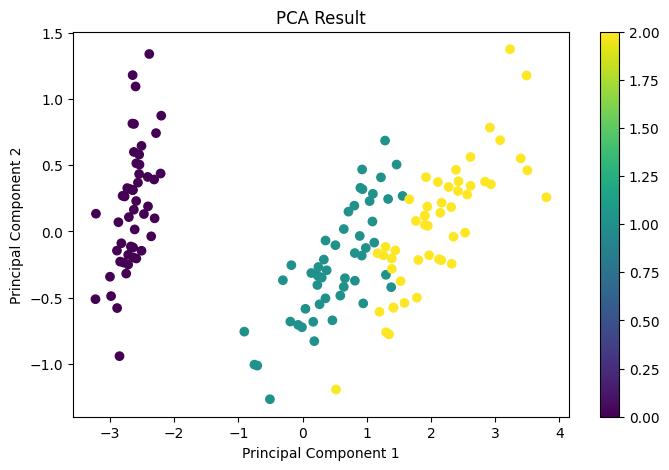

In [120]:
# PCA
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting PCA
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

### t-SNE (t-distributed Stochastic Neighbor Embedding)
t-SNE is a non-linear dimensionality reduction technique particularly well-suited for visualizing high-dimensional datasets.

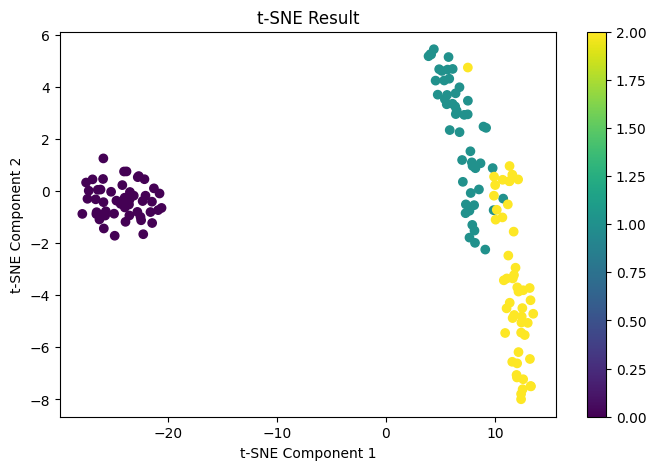

In [123]:
# t-SNE
from sklearn.manifold import TSNE

# Fit t-SNE
tsne = TSNE(n_components=2, random_state=10000)
X_tsne = tsne.fit_transform(X)

# Plotting t-SNE
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Result')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

In [124]:
tsne.kl_divergence_

0.12473513931035995